In [89]:
import warnings

In [90]:
warnings.filterwarnings('ignore')

In [91]:
import pandas as pd

In [92]:
data = pd.read_csv('pizza.csv')

In [93]:
data

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese
0,A,"Rp235,000",22.0,chicken,double_signature,jumbo,yes,yes
1,A,"Rp198,000",20.0,papperoni,double_signature,jumbo,yes,yes
2,A,"Rp120,000",16.0,mushrooms,double_signature,reguler,yes,yes
3,A,"Rp155,000",14.0,smoked beef,double_signature,reguler,yes,no
4,A,"Rp248,000",18.0,mozzarella,double_signature,jumbo,yes,no
...,...,...,...,...,...,...,...,...
124,E,"Rp39,000",8.5,tuna,spicy tuna,small,yes,yes
125,E,"Rp72,000",12.0,tuna,spicy tuna,medium,yes,yes
126,E,"Rp99,000",14.0,tuna,spicy tuna,large,yes,yes
127,E,"Rp44,000",8.5,meat,BBQ_meat_fiesta,small,yes,no


In [94]:
data['price'] = data['price_rupiah']

In [95]:
data = data.drop(columns = ['price_rupiah'])

In [96]:
data.head()

,company,diameter,topping,variant,size,extra_sauce,extra_cheese,price
0,A,22.0,chicken,double_signature,jumbo,yes,yes,"Rp235,000"
1,A,20.0,papperoni,double_signature,jumbo,yes,yes,"Rp198,000"
2,A,16.0,mushrooms,double_signature,reguler,yes,yes,"Rp120,000"
3,A,14.0,smoked beef,double_signature,reguler,yes,no,"Rp155,000"
4,A,18.0,mozzarella,double_signature,jumbo,yes,no,"Rp248,000"


In [97]:
data['price'] = data['price'].str.replace('Rp', '', regex=True)  # Remove 'Rp'
data['price'] = data['price'].str.replace(',', '', regex=True)  # Remove commas
data['price'] = data['price'].str.strip()  # Remove any extra spaces
data['price'] = data['price'].astype(int)  # Convert to integer

In [100]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   company       129 non-null    object 
 1   diameter      129 non-null    float64
 2   topping       129 non-null    object 
 3   variant       129 non-null    object 
 4   size          129 non-null    object 
 5   extra_sauce   129 non-null    object 
 6   extra_cheese  129 non-null    object 
 7   price         129 non-null    int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 8.2+ KB


In [101]:
data.describe()

,diameter,price
count,129.000000,129.000000
mean,12.976744,87151.162791
std,3.272674,44706.097732
min,8.000000,23500.000000
25%,12.000000,51000.000000
50%,12.000000,78000.000000
75%,14.000000,105000.000000
max,22.000000,248000.000000


In [102]:
data.head()

,company,diameter,topping,variant,size,extra_sauce,extra_cheese,price
0,A,22.0,chicken,double_signature,jumbo,yes,yes,235000
1,A,20.0,papperoni,double_signature,jumbo,yes,yes,198000
2,A,16.0,mushrooms,double_signature,reguler,yes,yes,120000
3,A,14.0,smoked beef,double_signature,reguler,yes,no,155000
4,A,18.0,mozzarella,double_signature,jumbo,yes,no,248000


In [104]:
data.isnull().sum()

company         0
diameter        0
topping         0
variant         0
size            0
extra_sauce     0
extra_cheese    0
price           0
dtype: int64

In [105]:
data['company'].unique()

array(['A', 'B', 'C', 'D', 'E'], dtype=object)

In [106]:
data['company'] = data['company'].replace({'A':0, 'B':1, 'C':2, 'D':3, 'E':4})

In [111]:
data['variant'].unique()

array(['double_signature', 'american_favorite', 'super_supreme',
       'meat_lovers', 'double_mix', 'classic', 'crunchy', 'new_york',
       'double_decker', 'spicy_tuna', 'BBQ_meat_fiesta', 'BBQ_sausage',
       'extravaganza', 'meat_eater', 'gournet_greek', 'italian_veggie',
       'thai_veggie', 'american_classic', 'neptune_tuna', 'spicy tuna'],
      dtype=object)

In [113]:
data[['extra_sauce','extra_cheese']] = data[['extra_sauce','extra_cheese']].replace({'yes':0,'no':1})

In [117]:
data['size'] = data['size'].replace({'jumbo':0, 'reguler':1, 'small':2, 'medium':3, 'large':4, 'XL':5})

In [118]:
from sklearn.preprocessing import LabelEncoder

In [120]:
le = LabelEncoder()
data['topping'] = le.fit_transform(data['topping'])
data['variant'] = le.fit_transform(data['variant'])

In [121]:
data.head()

,company,diameter,topping,variant,size,extra_sauce,extra_cheese,price
0,0,22.0,2,8,0,0,0,235000
1,0,20.0,7,8,0,0,0,198000
2,0,16.0,5,8,1,0,0,120000
3,0,14.0,9,8,1,0,1,155000
4,0,18.0,4,8,0,0,1,248000


In [122]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   company       129 non-null    int64  
 1   diameter      129 non-null    float64
 2   topping       129 non-null    int64  
 3   variant       129 non-null    int64  
 4   size          129 non-null    int64  
 5   extra_sauce   129 non-null    int64  
 6   extra_cheese  129 non-null    int64  
 7   price         129 non-null    int64  
dtypes: float64(1), int64(7)
memory usage: 8.2 KB


In [123]:
import seaborn as sns

<Axes: >

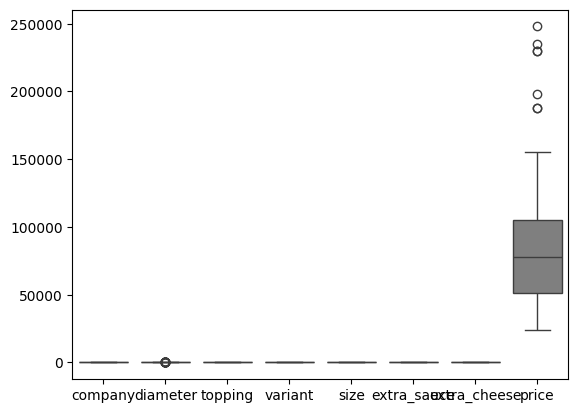

In [124]:
sns.boxplot(data)

In [128]:
from scipy import stats
import numpy as np

z_score = np.abs(stats.zscore(data['price']))
data = data[(z_score < 3)]

<Axes: >

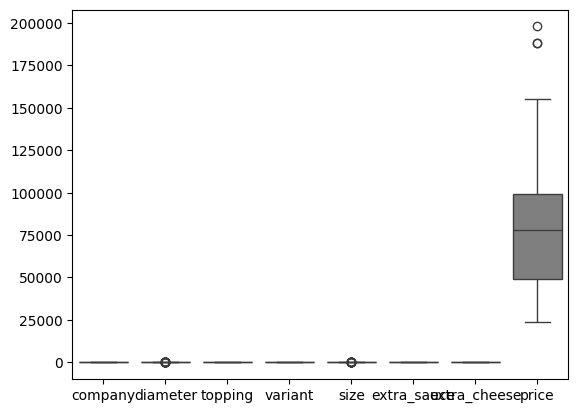

In [129]:
sns.boxplot(data)

In [130]:
data

,company,diameter,topping,variant,size,extra_sauce,extra_cheese,price
1,0,20.0,7,8,0,0,0,198000
2,0,16.0,5,8,1,0,0,120000
3,0,14.0,9,8,1,0,1,155000
5,0,18.5,1,3,0,1,1,140000
6,0,16.0,9,3,0,1,0,110000
...,...,...,...,...,...,...,...,...
124,4,8.5,10,16,2,0,0,39000
125,4,12.0,10,16,3,0,0,72000
126,4,14.0,10,16,4,0,0,99000
127,4,8.5,3,0,2,0,1,44000


In [131]:
x = data.drop(columns = ['price'])
y = data['price']

In [133]:
from sklearn.model_selection import train_test_split

In [134]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20,random_state = 42)

In [137]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

In [139]:
lr = LinearRegression()
lr.fit(x_train,y_train)

rf = RandomForestRegressor()
rf.fit(x_train,y_train)

gb = GradientBoostingRegressor()
gb.fit(x_train,y_train)

xgb = XGBRegressor()
xgb.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [140]:
y_pred1 = lr.predict(x_test)
y_pred2 = rf.predict(x_test)
y_pred3 = gb.predict(x_test)
y_pred4 = xgb.predict(x_test)

In [141]:
from sklearn import metrics

In [143]:
score1 = metrics.r2_score(y_test,y_pred1)
score2 = metrics.r2_score(y_test,y_pred2)
score3 = metrics.r2_score(y_test,y_pred3)
score4 = metrics.r2_score(y_test,y_pred4)

In [148]:
print(score1,score2,score3,score4)

0.7418590492089921 0.8429380837890277 0.9137492802874597 0.8782927989959717


In [149]:
final_data = pd.DataFrame({'models':['lr','rf','gb','xgb'],
            "r2score":[score1,score2,score3,score4]})

In [150]:
final_data

,models,r2score
0,lr,0.741859
1,rf,0.842938
2,gb,0.913749
3,xgb,0.878293


<Axes: xlabel='models', ylabel='r2score'>

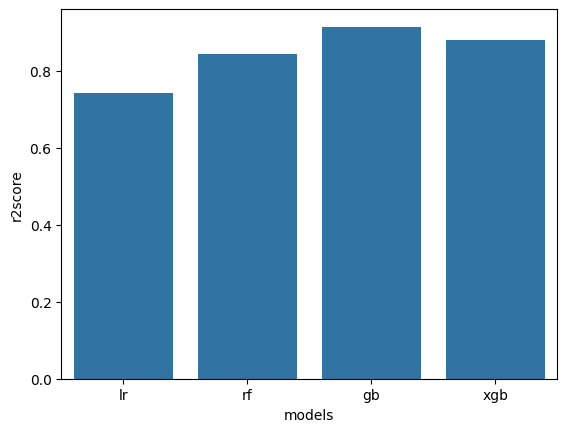

In [151]:
sns.barplot(x=final_data['models'], y=final_data['r2score'])

In [152]:
gb = GradientBoostingRegressor()
gb_final = gb.fit(x,y)

In [153]:
import joblib

In [156]:
joblib.dump(gb_final,'pizza_price_predictor')

['pizza_price_predictor']

In [157]:
model = joblib.load('pizza_price_predictor')

In [162]:
import pandas as pd
data_new = pd.DataFrame({
'company':0,
'diameter':16.0,
'topping':7,
'variant':8,
'size':0,
'extra_sauce':0,
'extra_cheese':0

},index=[0])

In [163]:
model.predict(data_new)

array([132429.00188779])

In [158]:
data.head()

,company,diameter,topping,variant,size,extra_sauce,extra_cheese,price
1,0,20.0,7,8,0,0,0,198000
2,0,16.0,5,8,1,0,0,120000
3,0,14.0,9,8,1,0,1,155000
5,0,18.5,1,3,0,1,1,140000
6,0,16.0,9,3,0,1,0,110000
